Assignment: Country Clustering for Aid Allocation

Deadline: Friday, May 2nd, 06:00 PM

Background
HELP International, a global humanitarian NGO, has raised $10 million to aid underdeveloped countries.
Based on socio-economic and health factors, they require a data-driven strategy to prioritize which countries need help the most.
Your task is to apply unsupervised learning (clustering) techniques to segment countries into meaningful groups for strategic fund distribution.
Note: Refer to the data and data dictionary for more information and a better understanding of the data.
This is a real-world scenario where unsupervised machine learning is used for decision-making without predefined labels.

Objectives
You are expected to:
Preprocess the data (handle missing values, duplicates, scaling).
Perform exploratory data analysis (EDA) to understand feature distributions and relationships.
Determine the optimal number of clusters (k) using techniques like the Elbow Method and Silhouette Score.
Apply K-Means clustering (and optionally Hierarchical clustering) to group countries.
Analyze and interpret the resulting clusters.
Recommend which groups of countries should be prioritized for funding.

Deliverables
A clean, well-commented Jupyter Notebook containing:
oPreprocessing steps
oEDA (univariate and bivariate analysis)
oOptimal k determination with clear plots
oClustering model development
oCluster profiling and business insights
oVisualizations of clusters
oA short Executive Summary recommending how HELP International should prioritize aid

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score





In [10]:
df = pd.read_csv("Country-data.csv")
df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Unnamed: 10
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,NaN
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,NaN
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,NaN
3,Angola,119,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,NaN
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      167 non-null    object 
 1   child_mort   167 non-null    object 
 2   exports      167 non-null    float64
 3   health       167 non-null    float64
 4   imports      167 non-null    float64
 5   income       167 non-null    float64
 6   inflation    167 non-null    float64
 7   life_expec   167 non-null    float64
 8   total_fer    167 non-null    float64
 9   gdpp         167 non-null    float64
 10  Unnamed: 10  4 non-null      float64
dtypes: float64(9), object(2)
memory usage: 14.5+ KB


**country :** name of country
**child_mort:** death of children under 5years of age per 1000 live births
**exports:** exports of goods and services per capita given as % age of the GDP per capita
**health :** total health spending per capita ,given as %age of GDP per capita
**imports:** imports of gi=ooda and services per capita , given as % age of GDP per capita
**income:** net income per person
inflation the measurement of annual growth rate of the total GDP
**life_expec** : the average number of years a new born child would libe if the current mortality patterns are to remain the same
**total_fer :** the numer of children that would be born to each woman if the current age-fertility rates remain the same
**gdpp : ** the GDP per capita ,Calculated as the Total GDP divided by the total population

In [ ]:
#remove the unmamed of columm
df.drop(columns=['Unnamed: 10'],inplace=True)

In [ ]:
# check duplicates data
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    object 
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    float64
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    float64
dtypes: float64(8), object(2)
memory usage: 13.2+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
exports,167.0,41.353287,27.936119,0.1090,23.80,35.00,51.400,200.0
health,167.0,7.760838,7.643689,1.8100,4.95,6.33,8.865,85.1
imports,167.0,45.622311,24.765596,0.0659,28.85,42.90,58.050,174.0
income,167.0,17023.158084,19359.928835,49.6000,3170.00,9940.00,22800.000,125000.0
inflation,167.0,130.486383,998.815277,-4.2100,1.81,5.45,11.150,11400.0
life_expec,167.0,69.298443,12.674000,2.0400,64.30,73.10,76.800,82.8
total_fer,167.0,4.390359,9.581274,1.1500,1.82,2.41,4.160,74.0
gdpp,167.0,12901.535449,18367.132440,1.4700,1310.00,4660.00,14050.000,105000.0


In [ ]:
# Convert specific columns to numeric, handling errors
for col in ['child_mort', 'exports', 'health', 'imports', 'income',
            'inflation', 'life_expec', 'total_fer', 'gdpp']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# proceed with feature scaling
X = df[['child_mort', 'exports', 'health', 'imports',
       'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

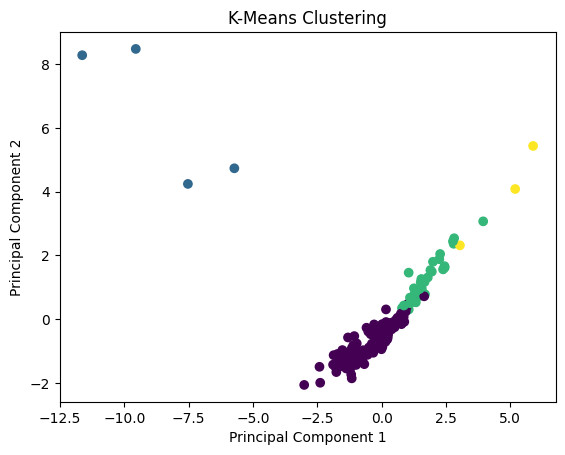

Silhouette Score: 0.37268408683346377
Davies-Bouldin Score: 0.8333586629971498
Calinski-Harabasz Score: 82.96242110860747


In [ ]:
# Implement k-means clustering
imputer = SimpleImputer(strategy='mean')
X = df[['child_mort', 'exports', 'health', 'imports',
       'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]
# Impute NaNs with the mean
X_imputed = imputer.fit_transform(X)
# proceed with feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed) # Use the imputed data

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=4) # You need to specify the number of clusters
kmeans.fit(X_scaled)


#visualize the clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_) # Access labels using labels_
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.show()

# Evaluate clustering performance
score = silhouette_score(X_scaled, kmeans.labels_)
davies_bouldin = davies_bouldin_score(X_scaled, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {score}')
print(f'Davies-Bouldin Score: {davies_bouldin}')
print(f'Calinski-Harabasz Score: {calinski_harabasz}')

In [ ]:
# Generate a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split the data into traning and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression MSE:', mse_lasso)
print(f'Lasso Regression Coefficients: ',lasso.coef_)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression MSE:', mse_ridge)
print(f'Ridge Regression Coefficients: ',ridge.coef_)


Lasso Regression MSE: 107.66424214462873
Lasso Regression Coefficients:  [43.02138252]
Ridge Regression MSE: 105.78604284136125
Ridge Regression Coefficients:  [43.57809123]


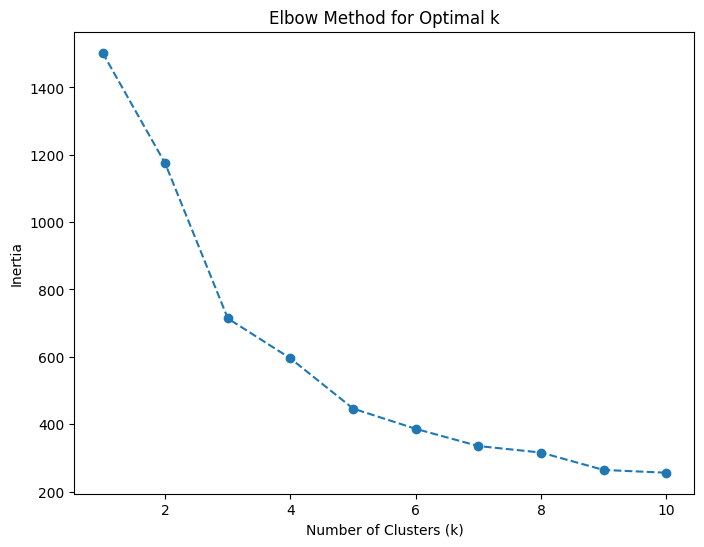

In [ ]:
#Calculating the inertia (within-cluster sum of squates)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
# Plotting
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

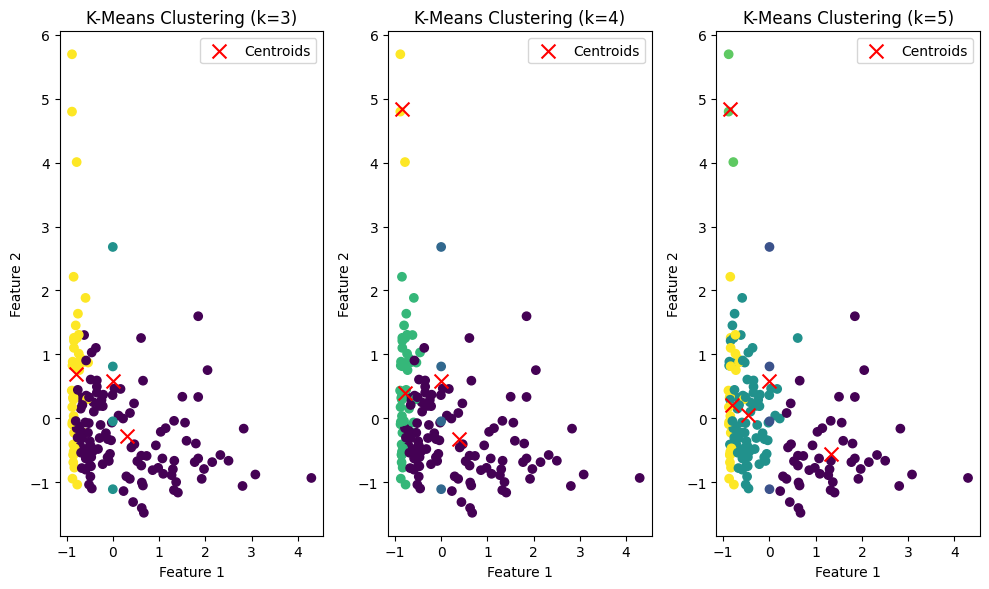

In [ ]:
# setting the figure size
plt.figure(figsize=(10, 6))

for i, k in enumerate([3,4,5]):
    plt.subplot(1,3,i+1)
# apply Kmeans
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    # Fit KMeans before accessing labels_
    y_pred = kmeans.fit_predict(X_scaled)
#scatter plot of the data points colored by labels
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
# plot the centroids
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, label='Centroids')
#adding titles and labels
    plt.title(f'K-Means Clustering (k={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.tight_layout()
    plt.legend()
plt.show()

In [ ]:
#group by cluster and compute statistics
# Fit KMeans before accessing labels_
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X_scaled) # Assuming X_scaled is still available
df['Cluster'] = kmeans.labels_  # Access labels using labels_
cluster_profile = df.groupby('Cluster').agg({'gdpp': ['mean', 'median', 'min', 'max'],
                                             'child_mort': ['mean', 'median'],
                                             'life_expec': ['mean', 'median'],
                                             'country': ['count']})
print(cluster_profile.T)

Cluster                       0       1          2              3
gdpp       mean     3570.818182   4.105  31781.000   57566.666667
           median   2830.000000   4.205  30650.000   46600.000000
           min       231.000000   1.470   7100.000   21100.000000
           max     17100.000000   6.540  87800.000  105000.000000
child_mort mean       52.715455     NaN      6.994       4.133333
           median     37.250000     NaN      5.350       2.800000
life_expec mean       66.856364  11.835     78.540      81.433333
           median     68.450000  12.250     79.500      81.300000
country    count     110.000000   4.000     50.000       3.000000


In [ ]:
#compare clusters to overall averages
#compute global averages
#compare clusters to overall averages
#compute global averages
global_avg = df.mean(numeric_only=True)
#compare each cluster's mean to global averge
for cluster in sorted(df['Cluster'].unique()):
    cluster_avg = df[df['Cluster'] == cluster].mean(numeric_only=True)
    diff = (cluster_avg - global_avg) / global_avg * 100
    print(f"Cluster {cluster} vs Global Average:")
    print(diff.round(2))




Cluster 0 vs Global Average:
child_mort     39.47
exports       -22.17
health        -19.86
imports        -5.06
income        -56.86
inflation     -92.46
life_expec     -3.52
total_fer     -21.54
gdpp          -72.32
Cluster      -100.00
dtype: float64
Cluster 1 vs Global Average:
child_mort        NaN
exports         39.23
health         510.44
imports        -82.65
income         -99.64
inflation     3835.08
life_expec     -82.92
total_fer     1365.14
gdpp           -99.97
Cluster         47.79
dtype: float64
Cluster 2 vs Global Average:
child_mort    -81.50
exports        26.09
health          3.60
imports         3.15
income        116.51
inflation     -97.51
life_expec     13.34
total_fer     -57.71
gdpp          146.34
Cluster       195.58
dtype: float64
Cluster 3 vs Global Average:
child_mort    -89.06
exports       325.60
health        -12.47
imports       243.40
income        276.15
inflation     -98.11
life_expec     17.51
total_fer     -68.57
gdpp          346.20
Cluster   

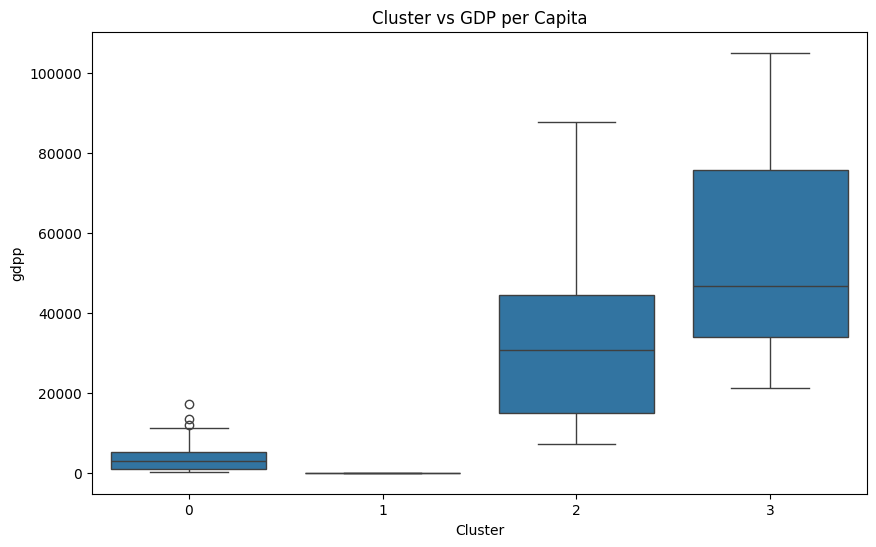

In [ ]:
# visual profiling with plots
plt.figure(figsize=(10, 6))
sns.boxplot (data=df, x='Cluster', y='gdpp')
plt.title('Cluster vs GDP per Capita')
plt.show()


base on the statistics results
0- high need countries - immediate humanitarian aid, focus on child health and povertu reduction , highest funding priority ( 60% budget)
1- developing countries - infrastrucure development, education and healthecare system support, moderate funding (30% budget)
2 and 3 - develped countries ( minimal or no funding , poential partners for funding initiatives)


In [ ]:
# export cluster members
for cluster in sorted(df['Cluster'].unique()):
    cluster_members = df[df['Cluster'] == cluster]['country']
    print(f"Cluster {cluster} Members:")
    print(cluster_members)
    print()


Cluster 0 Members:
0      Afghanistan
1          Albania
2          Algeria
3           Angola
5        Argentina
          ...     
162        Vanuatu
163      Venezuela
164        Vietnam
165          Yemen
166         Zambia
Name: country, Length: 110, dtype: object

Cluster 1 Members:
37          Congo
38          Congo
92      Macedonia
101    Micronesia
Name: country, dtype: object

Cluster 2 Members:
4       Antigua and Barbuda
7                 Australia
8                   Austria
10                  Bahamas
11                  Bahrain
13                 Barbados
15                  Belgium
23                   Brunei
29                   Canada
33                    Chile
41                  Croatia
42                   Cyprus
43           Czech Republic
44                  Denmark
51                  Estonia
53                  Finland
54                   France
58                  Germany
60                   Greece
67                  Hungary
68                  Iceland
7